In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [75]:
toyota = pd.read_csv('/Users/halders/Documents/Excelr/dataset/ToyotaCorolla_utf.csv')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [44]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
# check if there are any missing values
toyota.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [76]:
toyota_selected = ["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]
toyota1 = toyota[toyota_selected]
toyota1.rename(columns={"Age_08_04":"Age"},inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
toyota1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age            1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


(array([110., 706., 343., 114.,  75.,  59.,  22.,   4.,   0.,   3.]),
 array([ 4350.,  7165.,  9980., 12795., 15610., 18425., 21240., 24055.,
        26870., 29685., 32500.]),
 <a list of 10 Patch objects>)

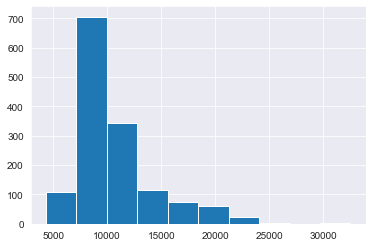

In [87]:
plt.hist(toyota1["Price"]) #right skewed data

(array([ 24.,  36.,  62.,  64., 108., 127., 182., 247., 287., 299.]),
 array([ 1. ,  8.9, 16.8, 24.7, 32.6, 40.5, 48.4, 56.3, 64.2, 72.1, 80. ]),
 <a list of 10 Patch objects>)

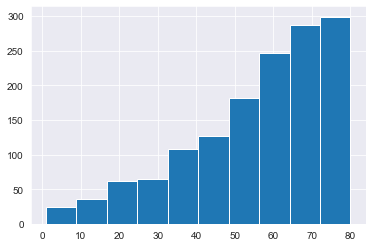

In [85]:
plt.hist(toyota1["Age"]) # left skewed data

(array([109., 285., 166., 865.,   0.,   0.,   0.,   0.,   0.,  11.]),
 array([ 69. ,  81.3,  93.6, 105.9, 118.2, 130.5, 142.8, 155.1, 167.4,
        179.7, 192. ]),
 <a list of 10 Patch objects>)

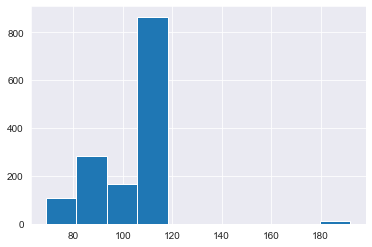

In [86]:
plt.hist(toyota1["HP"]) #left skewed data and  uneven data

(array([ 73., 577., 616.,  19.,   0.,   1., 110.,  18.,  19.,   3.]),
 array([ 19. ,  45.4,  71.8,  98.2, 124.6, 151. , 177.4, 203.8, 230.2,
        256.6, 283. ]),
 <a list of 10 Patch objects>)

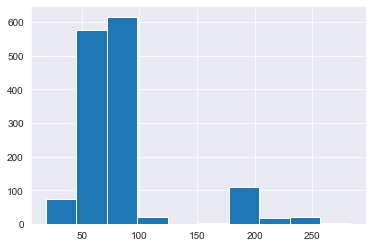

In [89]:
plt.hist(toyota1["Quarterly_Tax"]) # very uneven data and left skewed data

(array([664., 620., 107.,  18.,  19.,   3.,   0.,   4.,   0.,   1.]),
 array([1000. , 1061.5, 1123. , 1184.5, 1246. , 1307.5, 1369. , 1430.5,
        1492. , 1553.5, 1615. ]),
 <a list of 10 Patch objects>)

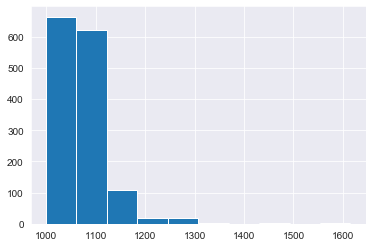

In [90]:
plt.hist(toyota1["Weight"]) # right skewed data

In [ ]:
#Doors and Gears are categorical data

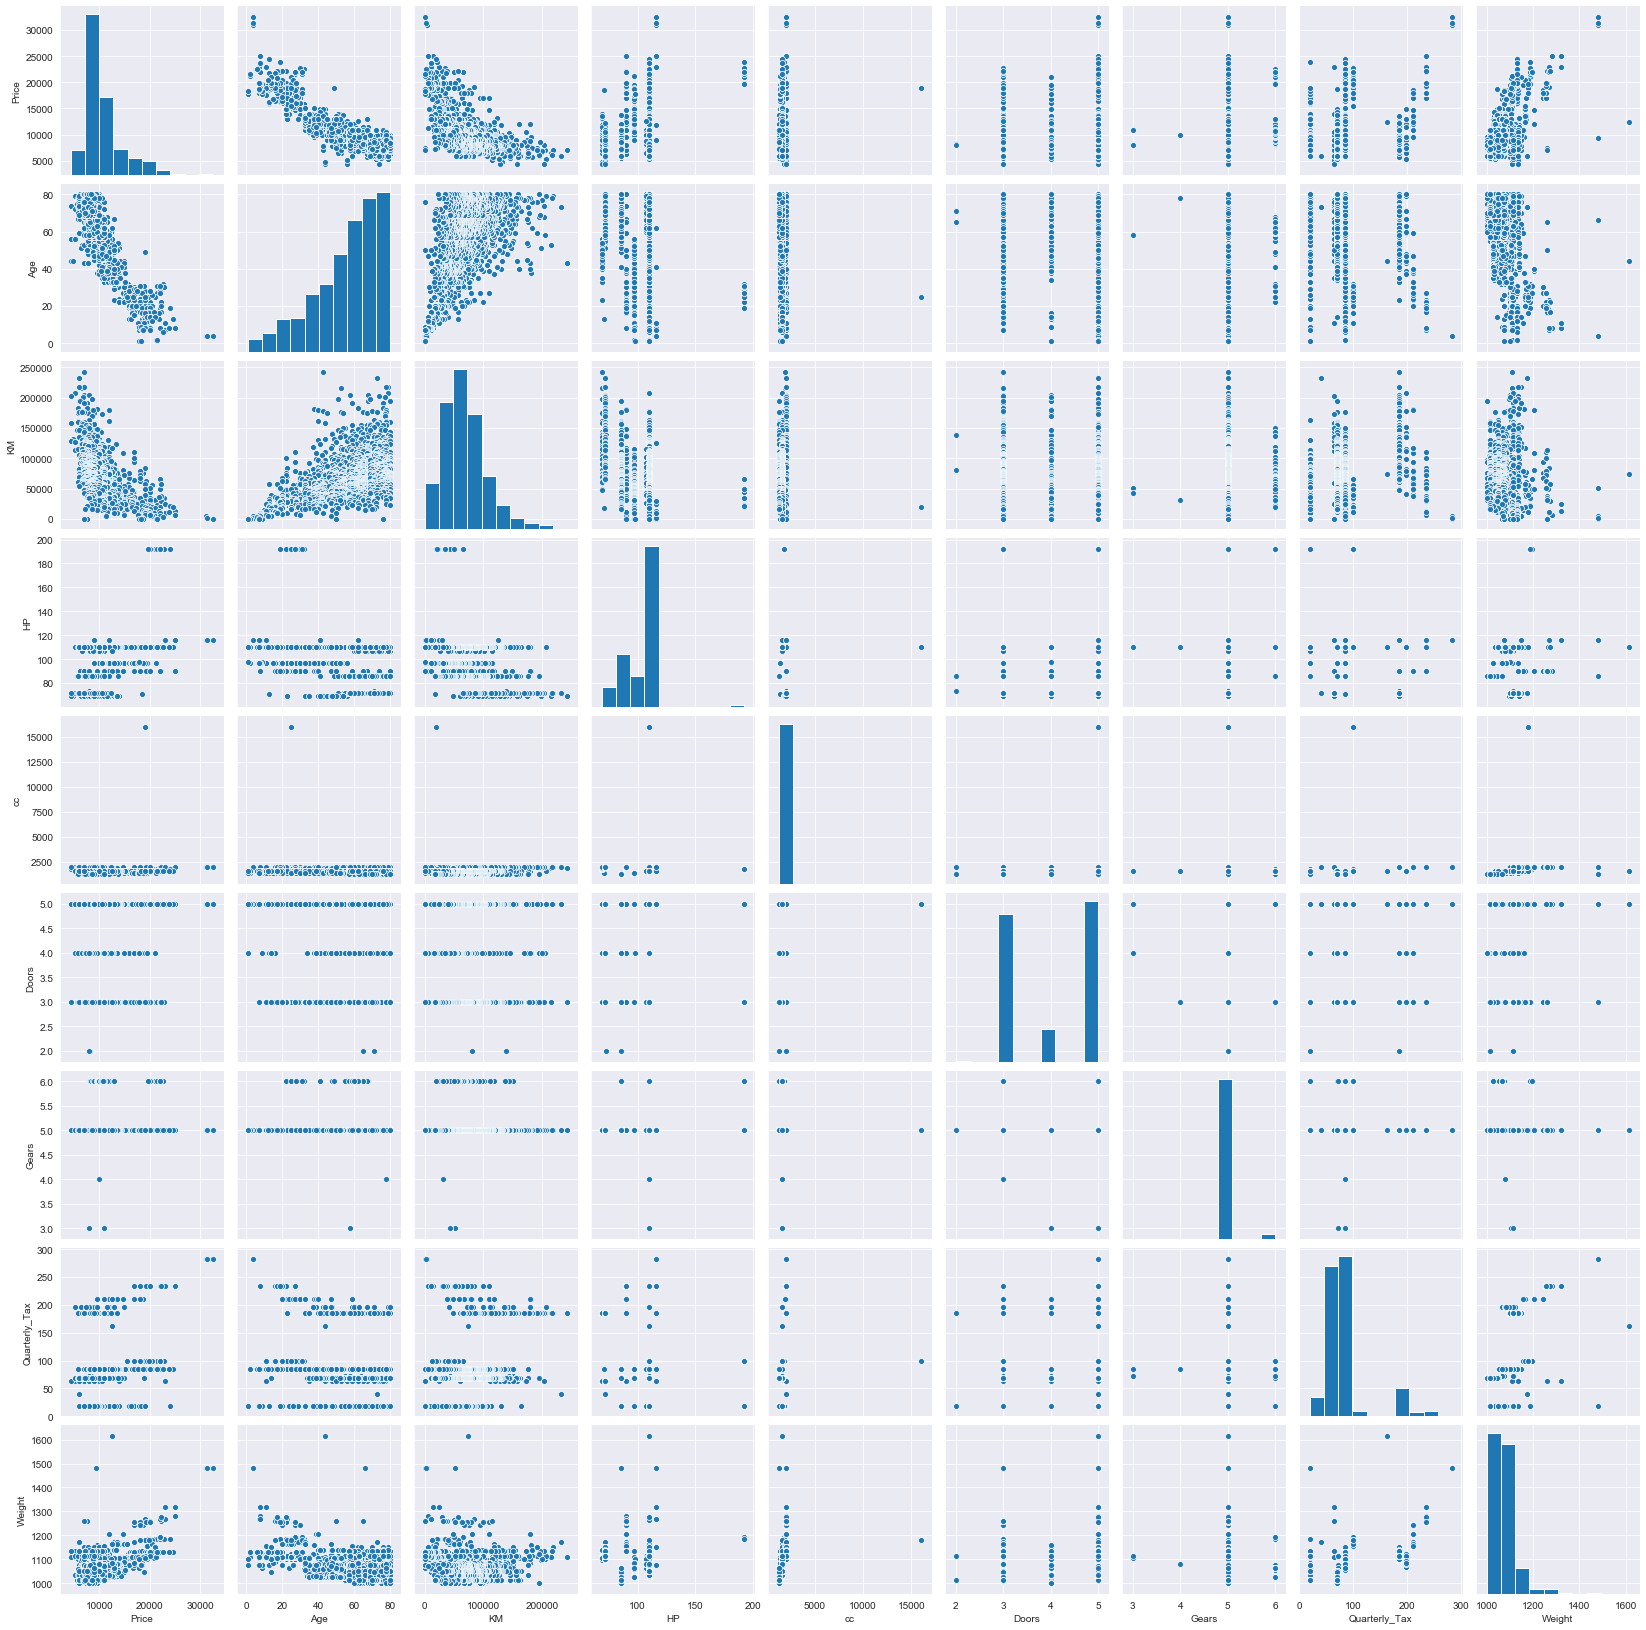

In [91]:
# plotting the data in a pairplot
sns.set_style(style='darkgrid')
sns.pairplot(toyota1)

## Correlation matrix



In [92]:
toyota1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


## Building OLS model


In [95]:
import statsmodels.formula.api as smf
m1= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= toyota1).fit()
m1.summary2()
# Doors and cc are insignificant

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:                 OLS               Adj. R-squared:      0.863     
Dependent Variable:    Price             AIC:                 24769.0766
Date:                  2021-05-22 23:00  BIC:                 24816.5032
No. Observations:      1436              Log-Likelihood:      -12376.   
Df Model:              8                 F-statistic:         1131.     
Df Residuals:          1427              Prob (F-statistic):  0.00      
R-squared:             0.864             Scale:               1.8022e+06
------------------------------------------------------------------------
                Coef.     Std.Err.    t     P>|t|    [0.025     0.975]  
------------------------------------------------------------------------
Intercept     -5573.1064 1411.3898  -3.9487 0.0001 -8341.7278 -2804.4849
Age            -121.6584    2.6156 -46.5119 0.0000  -126.7893  -116.5275
KM               -0.0208    0.0013 -16.6216 0.0000    -0.0233    -0.0184
HP               31.6809    2.8183  11.2410 0.0000    26.1524    37.2094
cc               -0.1211    0.0901  -1.3442 0.1791    -0.2978     0.0556
Doors            -1.6166   40.0056  -0.0404 0.9678   -80.0927    76.8594
Gears           594.3199  197.0552   3.0160 0.0026   207.7709   980.8690
Quarterly_Tax     3.9491    1.3100   3.0145 0.0026     1.3793     6.5188
Weight           16.9586    1.0679  15.8798 0.0000    14.8637    19.0535
------------------------------------------------------------------------
Omnibus:                151.719        Durbin-Watson:           1.543   
Prob(Omnibus):          0.000          Jarque-Bera (JB):        1011.853
Skew:                   -0.219         Prob(JB):                0.000   
Kurtosis:               7.089          Condition No.:           3126447 
========================================================================
* The condition number is large (3e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

### Building individual models to see if Doors and CC are significant or not.

In [99]:
m1_cc = smf.ols("Price~cc",data = toyota1).fit()
m1_cc.summary2()
# We can see that cc is significant

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.015     
Dependent Variable: Price            AIC:                27594.4137
Date:               2021-05-22 23:04 BIC:                27604.9529
No. Observations:   1436             Log-Likelihood:     -13795.   
Df Model:           1                F-statistic:        23.28     
Df Residuals:       1434             Prob (F-statistic): 1.55e-06  
R-squared:          0.016            Scale:              1.2954e+07
-------------------------------------------------------------------
                Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept     9027.5548 365.5755 24.6941 0.0000 8310.4346 9744.6749
cc               1.0802   0.2239  4.8248 0.0000    0.6410    1.5193
-------------------------------------------------------------------
Omnibus:             465.181       Durbin-Watson:          0.267   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       1390.401
Skew:                1.649         Prob(JB):               0.000   
Kurtosis:            6.516         Condition No.:          6285    
===================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [100]:
m1_doors = smf.ols("Price~Doors", data= toyota1).fit()
m1_doors.summary()
## doors is also significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Sat, 22 May 2021   Prob (F-statistic):           1.46e-12
Time:                        23:05:17   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
m1_doors_cc = smf.ols("Price~Doors+cc", data= toyota1).fit()
m1_doors_cc.summary()
## doors and cc both are  significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Sat, 22 May 2021   Prob (F-statistic):           1.15e-15
Time:                        23:06:04   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
cc             0.9597      0.221      4.340      0.000       0.526       1.393
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residual analysis

### Test for normlality QQ PLot

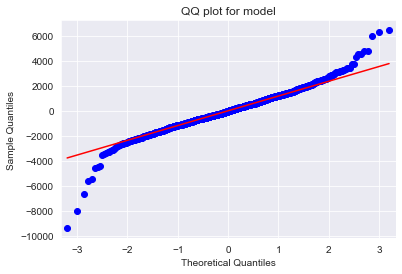

In [102]:
import statsmodels.api as sm
qqplot = sm.qqplot(m1.resid, line = 'q')
plt.title("QQ plot for model")
plt.show()

## Residual plot for homoscedasticity 

In [103]:
def get_standardized_values(vals):
    return( vals - vals.mean())/vals.std()

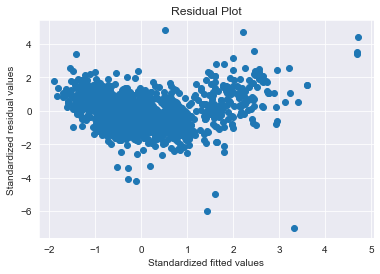

In [104]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(m1.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Cook's Distance 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

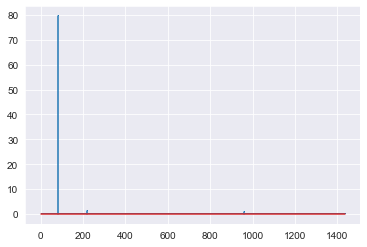

In [105]:
m1_influence = m1.get_influence()
(c, _) = m1_influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

In [106]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.520106241419)

## High Influence points

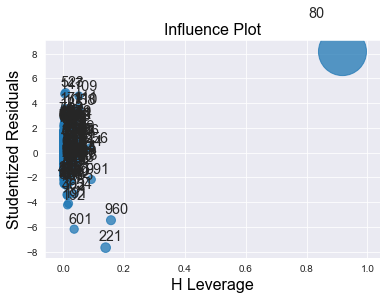

In [107]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(m1)
plt.show()

## Improving the model

### We can see that the point 80 has high influence.

In [123]:
# Removing 80 and then checking influence again
toyota2 = toyota1.drop(toyota.index[[80]],axis = 0)
m2 = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= toyota2).fit()
m2.summary2()

# we see that cc is significant now , but still Doors is insignificant

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:                 OLS               Adj. R-squared:      0.869     
Dependent Variable:    Price             AIC:                 24687.2810
Date:                  2021-05-22 23:23  BIC:                 24734.7013
No. Observations:      1435              Log-Likelihood:      -12335.   
Df Model:              8                 F-statistic:         1186.     
Df Residuals:          1426              Prob (F-statistic):  0.00      
R-squared:             0.869             Scale:               1.7230e+06
------------------------------------------------------------------------
                Coef.     Std.Err.    t     P>|t|    [0.025     0.975]  
------------------------------------------------------------------------
Intercept     -6284.7401 1382.7485  -4.5451 0.0000 -8997.1795 -3572.3006
Age            -120.4550    2.5617 -47.0213 0.0000  -125.4802  -115.4299
KM               -0.0178    0.0013 -13.9726 0.0000    -0.0204    -0.0153
HP               39.3463    2.9112  13.5155 0.0000    33.6356    45.0570
cc               -2.5242    0.3072  -8.2159 0.0000    -3.1268    -1.9215
Doors           -27.2285   39.2414  -0.6939 0.4879  -104.2056    49.7486
Gears           523.9416  192.8652   2.7166 0.0067   145.6116   902.2715
Quarterly_Tax     9.0440    1.4248   6.3475 0.0000     6.2490    11.8389
Weight           20.1655    1.1156  18.0757 0.0000    17.9770    22.3539
------------------------------------------------------------------------
Omnibus:                246.945        Durbin-Watson:           1.595   
Prob(Omnibus):          0.000          Jarque-Bera (JB):        2706.374
Skew:                   -0.443         Prob(JB):                0.000   
Kurtosis:               9.669          Condition No.:           3132384 
========================================================================
* The condition number is large (3e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

In [124]:
# Removing 80 and 221 now  as 221 was the next most influencial point and then checking influence again
toyota3 = toyota1.drop(toyota.index[[80,221]],axis = 0)
m3 = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= toyota3).fit()
m3.summary2()

# we see that cc is significant now , but still Doors is insignificant

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                 OLS                Adj. R-squared:       0.877     
Dependent Variable:    Price              AIC:                  24574.7766
Date:                  2021-05-22 23:24   BIC:                  24622.1906
No. Observations:      1434               Log-Likelihood:       -12278.   
Df Model:              8                  F-statistic:          1280.     
Df Residuals:          1425               Prob (F-statistic):   0.00      
R-squared:             0.878              Scale:                1.6122e+06
--------------------------------------------------------------------------
                 Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
--------------------------------------------------------------------------
Intercept     -10252.4237 1395.7331  -7.3455 0.0000 -12990.3358 -7514.5116
Age             -116.5783    2.5084 -46.4746 0.0000   -121.4989  -111.6577
KM                -0.0173    0.0012 -13.9664 0.0000     -0.0197    -0.0148
HP                39.2932    2.8160  13.9533 0.0000     33.7691    44.8172
cc                -3.2057    0.3050 -10.5111 0.0000     -3.8039    -2.6074
Doors            -65.3718   38.1519  -1.7135 0.0868   -140.2117     9.4681
Gears            485.0462  186.6023   2.5994 0.0094    119.0014   851.0909
Quarterly_Tax      7.9664    1.3825   5.7624 0.0000      5.2545    10.6783
Weight            25.0494    1.1855  21.1290 0.0000     22.7238    27.3750
--------------------------------------------------------------------------
Omnibus:                197.976         Durbin-Watson:            1.638   
Prob(Omnibus):          0.000           Jarque-Bera (JB):         1765.342
Skew:                   -0.317          Prob(JB):                 0.000   
Kurtosis:               8.399           Condition No.:            3265222 
==========================================================================
* The condition number is large (3e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

In [128]:
# Removing 80 ,221 and 960 now as 960 was the next most influencial point and then checking influence again
toyota4 = toyota1.drop(toyota.index[[80,221,960]],axis = 0)
m4 = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= toyota3).fit()
m4.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                 OLS                Adj. R-squared:       0.877     
Dependent Variable:    Price              AIC:                  24574.7766
Date:                  2021-05-23 00:06   BIC:                  24622.1906
No. Observations:      1434               Log-Likelihood:       -12278.   
Df Model:              8                  F-statistic:          1280.     
Df Residuals:          1425               Prob (F-statistic):   0.00      
R-squared:             0.878              Scale:                1.6122e+06
--------------------------------------------------------------------------
                 Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
--------------------------------------------------------------------------
Intercept     -10252.4237 1395.7331  -7.3455 0.0000 -12990.3358 -7514.5116
Age             -116.5783    2.5084 -46.4746 0.0000   -121.4989  -111.6577
KM                -0.0173    0.0012 -13.9664 0.0000     -0.0197    -0.0148
HP                39.2932    2.8160  13.9533 0.0000     33.7691    44.8172
cc                -3.2057    0.3050 -10.5111 0.0000     -3.8039    -2.6074
Doors            -65.3718   38.1519  -1.7135 0.0868   -140.2117     9.4681
Gears            485.0462  186.6023   2.5994 0.0094    119.0014   851.0909
Quarterly_Tax      7.9664    1.3825   5.7624 0.0000      5.2545    10.6783
Weight            25.0494    1.1855  21.1290 0.0000     22.7238    27.3750
--------------------------------------------------------------------------
Omnibus:                197.976         Durbin-Watson:            1.638   
Prob(Omnibus):          0.000           Jarque-Bera (JB):         1765.342
Skew:                   -0.317          Prob(JB):                 0.000   
Kurtosis:               8.399           Condition No.:            3265222 
==========================================================================
* The condition number is large (3e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

### As the adjusted R Square values and R square values doesnt change much even after we remove the last influencial point , so we can consider model 3 or m3 as the final improvement and now we can build the final model.

## Bluilding final model

In [129]:
finalmodel = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = toyota3).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1280.
Date:                Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                        00:11:39   Log-Likelihood:                -12278.
No. Observations:                1434   AIC:                         2.457e+04
Df Residuals:                    1425   BIC:                         2.462e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.025e+04   1395.733     -7.346      0.000    -1.3e+04   -7514.512
Age            -116.5783      2.508    -46.475      0.000    -121.499    -111.658
KM               -0.0173      0.001    -13.966      0.000      -0.020      -0.015
HP               39.2932      2.816     13.953      0.000      33.769      44.817
cc               -3.2057      0.305    -10.511      0.000      -3.804      -2.607
Doors           -65.3718     38.152     -1.713      0.087    -140.212       9.468
Gears           485.0462    186.602      2.599      0.009     119.001     851.091
Quarterly_Tax     7.9664      1.382      5.762      0.000       5.254      10.678
Weight           25.0494      1.186     21.129      0.000      22.724      27.375
==============================================================================
Omnibus:                      197.976   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.342
Skew:                          -0.317   Prob(JB):                         0.00
Kurtosis:                       8.399   Cond. No.                     3.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
toyota3

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


## Predicting new data

In [132]:
#New data for prediction
new_data=pd.DataFrame({"Age":20,"KM":18000,"HP":100,"cc":1600,"Quarterly_Tax":69,"Doors":5,"Gears":5,"Weight":1114},index=[1])

In [134]:
finalmodel_predict = finalmodel.predict(new_data)
finalmodel_predict

1    16458.438664
dtype: float64

In [136]:
finalmodel.predict(toyota2.iloc[0:5,])

0    16464.269143
1    16015.934400
2    16438.822844
3    16097.016263
4    15920.074311
dtype: float64